Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №7.

* Написать модель Random Forest на датасет больных сердечными болезнями (можно почистить от выбросов).

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

import seaborn as sns
import statistics as sts
from scipy import stats

In [18]:
url = "http://yustiks.ru/dataset/cardio_train.csv"
data = pd.read_csv(url,sep=";")
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [31]:
df = data.iloc[:,-1]
df = pd.DataFrame(df)
df['cardio_0'] = df.apply(lambda x: 1 if x['cardio']==0 else 0, axis=1)
df['cardio_1'] = df.apply(lambda x: 1 if x['cardio']==1 else 0, axis=1)
df = df.drop('cardio', axis=1)
df

,cardio_0,cardio_1
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
69995,1,0
69996,0,1
69997,0,1
69998,0,1


In [32]:
input_x = data.iloc[:,1:12]
output_y = df

In [34]:
le = LabelEncoder()
targets = (output_y.iloc[:,:]==1).idxmax(1)
print(targets.value_counts())
Y = le.fit_transform(targets)

cardio_0    35021
cardio_1    34979
dtype: int64


In [37]:
X_train, X_test, y_train, y_test = train_test_split(input_x, Y, test_size=0.3)

In [38]:
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

No handles with labels found to put in legend.


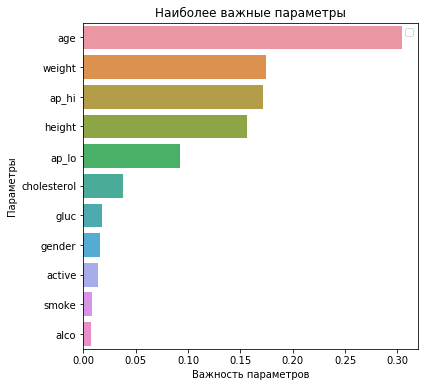

In [46]:
headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_, index=headers).sort_values(ascending=False)
# feature_imp
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность параметров')
plt.ylabel('Параметры')
plt.title("Наиболее важные параметры")
plt.legend()
plt.show()

In [45]:
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     10512
           1       0.72      0.70      0.71     10488

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



0.7154285714285714

Данный датасет разобран в начале лекции 5. 

Модель Random Forest при обучении дает такой метод как feature importance, используя его, можно оценить, какой параметр **максимально** влияет на болезнь.

* Сделать вывод о том, какой атрибут оказывает значительное влияение на наличие или отсутствие болезни.

Основная задача: определить, что влияет на сердечную болезнь больше всего. Например, выдвигая гипотезу о том, что тот кто курит, болеет чаще, мы сравниваем курящих пациентов с некурящими, и определяя насколько статистически значимы выборки, делаем вывод, что одна выборка статистически отличима от другой (или неотличима).
    Выдвигаем гипотезу на самый важный атрибут, полученный из feature_importance (Random_Forest). И оцениваем гипотезу. И делаем вывод.

Ttest_indResult(statistic=-64.87686765829967, pvalue=0.0)


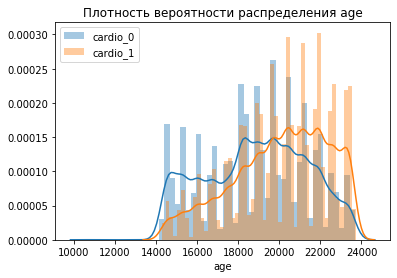

In [57]:
# Гипотеза: чем ниже возраст, тем ниже вероятность сердечного заболевания

cardio_0 = data[data['cardio']==0]['age']
cardio_1 = data[data['cardio']==1]['age']

print(stats.ttest_ind(cardio_0, cardio_1))

sns.distplot(cardio_0, 50)
sns.distplot(cardio_1, 50)
plt.title('Плотность вероятности распределения age')
plt.legend(['cardio_0', 'cardio_1'])
plt.show()

**Вывод:** \
p-value гораздо ниже 0.05 - отвергаем $H_0$, выборки отличаются друг от друга. \
Параметр имеет влияние на вероятность возникновения заболевания.